<a href="https://colab.research.google.com/github/clionelove123/Machine_Learning/blob/main/ML_Chap_10_Genetic_Algorithm_ksnapsack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [861]:
# Reference: https://github.com/megics/knapsack-GA/tree/master (Meliha Gizem ÇELİK 2018)

import math
import matplotlib.pyplot as plt
import random

In [862]:
weightList=[31,5,1,36,36,25,38,29,38,26,46,10,32,15,31,23,7,32,23,40,31,41,33,23,1,41,47,33,10,16,28,36,41,26,49,25,47,26,37,9,35,14,34,15,20,49,49,15,39,5,8,30,39,35,11,32,24,19,28,45,41,24,50,46,47,47,16,28,43,3]
valueList=[18,45,32,36,11,30,11,39,10,29,42,9,48,34,1,37,26,21,19,40,6,2,17,10,36,37,6,41,5,27,23,9,43,33,29,34,12,37,48,31,5,49,48,16,8,7,27,50,2,44,42,46,5,32,15,15,29,43,25,7,42,35,29,48,7,21,29,9,3,38]
populationSize=100
k=4
m=0.05
iteration=1000
bagSize = 1500

init_usage_rate=0.001

In [863]:
### create population method ###
def initialise():
	person = ""
	personList = []
	for x in range(populationSize):
		for z in range(len(weightList)):
			if(random.random() < init_usage_rate):
				person += "1"
			else:
				person += "0"
		personList.append(person)
		person = ""
	return personList


In [864]:
### create fitness values list for population in this method ###
def evaluate(pList):
	sumWeight=0
	sumValue=0
	fitnessList = []
	for i in range(len(pList)):
		for j in range(len(pList[i])):
			if(pList[i][j] == "1"):
				sumWeight += int(weightList[j])
				sumValue += int(valueList[j])
		if(sumWeight <= bagSize):
			fitnessList.append((pList[i],sumValue))
		else:
			fitnessList.append((pList[i],0))
		sumWeight=0
		sumValue=0
	return fitnessList

In [865]:
### using tournament select algorithm for parent select in this method ###
def parentSelect(fList):
	tempList = []
	parentSelectList = []
	for i in range(len(fList)):
		for j in range(int(k)):
			index = math.ceil(random.random()*len(fList))-1
			tempList.append(fList[index])
		tempList.sort()
		parentSelectList.append(tempList[0])
		tempList = []
	return parentSelectList

In [866]:
### recombine parents and create child list in this method ###
def recombine(pList):
	childList = []
	for i in range(int(len(pList)/2)):
		index = math.ceil(random.random()*len(weightList))-1
		c1=pList[i][0][:index]+pList[i+1][0][index:]
		c2=pList[i+1][0][:index]+pList[i][0][index:]
		childList.append(c1)
		childList.append(c2)
	return childList

In [867]:
### mutation apply the child list and create mutation list in this method ###
def mutation(cList):
	mutationList = []
	for i in range(len(childList)):
		for j in range(len(weightList)):
			if(random.random() < m):
				if(childList[i][j]=="0"):
					temp = list(childList[i])
					temp[j] = "1"
					childList[i] = "".join(temp)
				else:
					temp = list(childList[i])
					temp[j] = "0"
					childList[i] = "".join(temp)
		mutationList.append(childList[i])

	return mutationList

In [868]:
### choose the best childrens in this method ###
def survivorSelect(cList, pList):
	childEva = evaluate(cList)
	eva = list(childEva + pList)
	eva.sort(key=lambda srt: srt[1],reverse=True)

	return eva[:len(pList)]

0000000000000000000000000000000000000000000000000000000000000000000000
1 ('0000011000000000000000000000000000000110001000000001001000000000110000', 263)
2 ('0010000000000001001100000000010000000000000000010000000000000011000000', 282)
3 ('0000000000000000101000100001100100010100000010000110000000001000001001', 391)
4 ('0001000000101001011000000000001100100000000001000000000111100100111000', 475)
5 ('0100010010010000110000110100001000000100011100010100000010111000000000', 575)
6 ('0000000000000100000000000000000010000111011010010011111111010110100011', 694)
7 ('1000000001001011010010001101000010000111011000010000011111010110100010', 795)
9 ('0000000100001001100100100100101001000111011010010011111111000010100011', 880)
10 ('0000000110011001100100101100100010001111011010010011111111000011100011', 982)
11 ('1100000110011001100100101110100001001110011010010111110111000010100001', 988)
12 ('0000000000000001111100111101010010000111011110010011111101011110010011', 1014)
13 ('000000010000100010

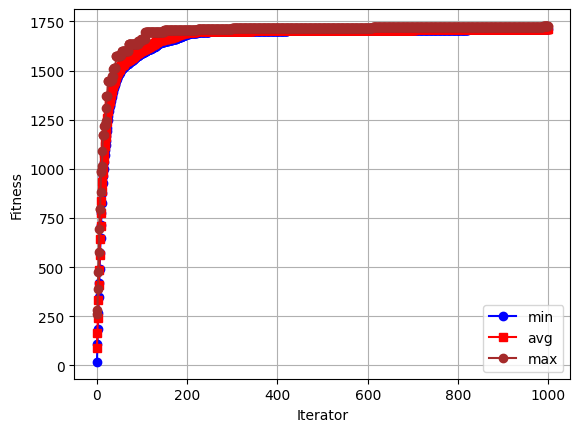

In [869]:
i = 0
minList = []
maxList = []
avg = 0
avgList = []
itList = range(iteration)

populationList=initialise()
print(populationList[0])
fitnessList=evaluate(populationList)

fit_pre=0

while(i < iteration):
  avg = 0
  parentSelectedList = parentSelect(fitnessList)
  childList = recombine(parentSelectedList)
  mutationList = mutation(childList)
  survivorList = survivorSelect(mutationList,fitnessList)

  for j in range(len(survivorList)):
    avg += int(survivorList[j][1])

  avgList.append(avg/len(survivorList))
  minList.append(min(survivorList,key=lambda srt: srt[1])[1])
  maxList.append(max(survivorList,key=lambda srt: srt[1])[1])
  fitnessList = survivorList
  i += 1
  if fit_pre!=survivorList[0][1]:
    print(i,survivorList[0])
  fit_pre=survivorList[0][1]

print(survivorList)

### display graphic for min, max and average values ###
plt.plot(itList,minList,'o-',c='blue')
plt.plot(itList,avgList,'s-',c='red')
plt.plot(itList,maxList,'o-',c='brown')
plt.grid(True)
plt.xlabel('Iterator')
plt.ylabel('Fitness')
plt.legend(["min","avg","max"])
plt.show()